# Task 2
Create an array of redshifts between 0 and 6 with the size of the array = 100.  
Calculate the angular diameter distance assuming the FlatLambdaCDM cosmology and save the corresponding values in a fits table.  
Make a plot with both redshift and universe age axes using astropy.cosmology as shown here. 

In [12]:
#Importing necessary packages
import matplotlib.pyplot as plt
from IPython.display import Image
from astropy.cosmology import FlatLambdaCDM as lcdm
from astropy.cosmology import z_at_value
import astropy.units as u
import numpy as np
from astropy.io import fits as f

#Defining the values for LCDM cosmology
cosmo=lcdm(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

In [13]:
#Creating an array of redshifts from 0 to 6 with 100 points
z=np.arange(0,6,0.06)

#Calculating the angular diameter distance for all the previously stored redshift values
d=cosmo.angular_diameter_distance(z)

In [14]:
print("Unit of angular diameter distance is: ",d.unit)

Unit of angular diameter distance is:  Mpc


Text(0, 0.5, 'Angular diameter distance in Mpc')

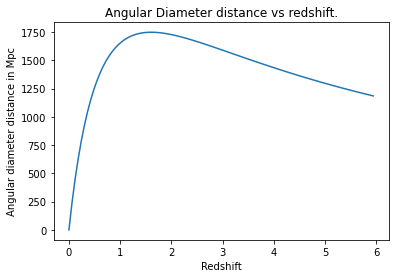

In [15]:
#Plotting the angular diameter distance vs redshift
plt.plot(z,d)
plt.title("Angular Diameter distance vs redshift.")
plt.xlabel("Redshift")
plt.ylabel("Angular diameter distance in Mpc")

In [20]:
#Creating an array of the ages we want to display on the second axis
ages=np.array([13,10,8,6,5,4,3,2,1])*u.Gyr

In [21]:
#Creating a variable to store the points where age ticks need to be applied corresponding to above ages
ageticks=[z_at_value(cosmo.age,age) for age in ages]

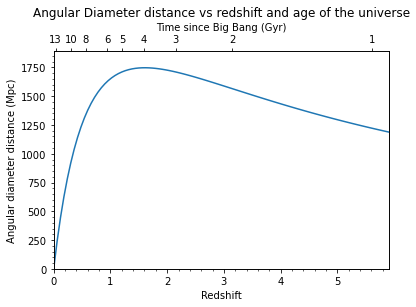

In [28]:
#Plotting the figure again, now with the age axis on top
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(z,d)
ax2=ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
plt.title("Angular Diameter distance vs redshift and age of the universe")
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()

#### Storing the distance data in a fits file

In [23]:
#Creating columns to be stored in the table
hd1=f.Column(name='redshift',format='20A',array=z)
hd2=f.Column(name="Angular Distance",format='20A',array=d)

In [24]:
#Creating a table with the above data
cols=f.ColDefs([hd1,hd2])
hd=f.BinTableHDU.from_columns(cols)

In [26]:
#writing the data to a new fits file
hd.writeto("AngDist.fits")